# Matrix Factorization and Recommender systems

## 1 Concepts

In [1]:
import networkx as nx
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Lecture du fichier de données
data = pd.read_csv('./movie_ratings_synth.csv', sep=',')

In [3]:
data

,Unnamed: 0,Die Hard,Terminator,Pride and Prejudice,The Notebook,Mr. & Mrs. Smith
0,User1,5,4,1,1,3
1,User2,4,5,2,1,4
2,User3,1,2,5,4,3
3,User4,1,1,4,5,2


In [4]:
from sklearn.decomposition import NMF

In [6]:
df = data.drop(data.columns[0], axis=1)

In [7]:
df

,Die Hard,Terminator,Pride and Prejudice,The Notebook,Mr. & Mrs. Smith
0,5,4,1,1,3
1,4,5,2,1,4
2,1,2,5,4,3
3,1,1,4,5,2


In [8]:
nmf = NMF(n_components=2, random_state=0).fit(df)

In [10]:
nmf.components_

array([[ 0.        ,  6.4369554 , 48.55199267, 49.7138937 , 20.47530115],
       [ 2.99879863,  3.0025004 ,  0.82283249,  0.42731738,  2.27594443]])

In [14]:
movie_names = ['Die Hard', 'Terminator', 'Pride and Prejudice', 'The Notebook', 'Mr. & Mrs Smith']

In [15]:
nmf_components = [[0, 2.99879863], [6.4369554, 3.0025004], [48.55199267, 0.82283249], [49.7138937, 0.42731738], [20.47530115, 2.27594443]]

In [16]:
tab = pd.DataFrame({"Movie": movie_names, "Factor1": [v[0] for v in nmf_components], "Factor2": [v[1] for v in nmf_components]})

In [17]:
tab

,Movie,Factor1,Factor2
0,Die Hard,0.000000,2.998799
1,Terminator,6.436955,3.002500
2,Pride and Prejudice,48.551993,0.822832
3,The Notebook,49.713894,0.427317
4,Mr. & Mrs Smith,20.475301,2.275944


## 2 Real example

### 1. User-Item dataset: getting started


In [19]:
#Lecture du fichier de données
data2 = pd.read_csv('./ratings_clean_names.csv', sep=',')

In [20]:
data2

,userId,rating,movieId,timestamp,title_safe
0,2038,2.0,18,1305046590,Four Rooms(5.0)
1,2858,4.0,18,856639289,Four Rooms(5.0)
2,2928,4.0,18,862900088,Four Rooms(5.0)
3,5687,4.0,18,865421714,Four Rooms(5.0)
4,6795,2.5,18,1336325802,Four Rooms(5.0)
...,...,...,...,...,...
661577,261914,4.0,164179,1485128590,Arrival(329865.0)
661578,264792,4.0,164179,1491707845,Arrival(329865.0)
661579,266079,4.0,164179,1492199245,Arrival(329865.0)
661580,267000,1.0,164179,1494407327,Arrival(329865.0)


In [21]:
data2.head()

,userId,rating,movieId,timestamp,title_safe
0,2038,2.0,18,1305046590,Four Rooms(5.0)
1,2858,4.0,18,856639289,Four Rooms(5.0)
2,2928,4.0,18,862900088,Four Rooms(5.0)
3,5687,4.0,18,865421714,Four Rooms(5.0)
4,6795,2.5,18,1336325802,Four Rooms(5.0)


In [22]:
data2.describe()

,userId,rating,movieId,timestamp
count,661582.000000,661582.000000,661582.000000,6.615820e+05
mean,135557.985403,3.738128,6853.423527,1.044341e+09
std,78715.853219,1.029456,21426.913875,2.423477e+08
min,22.000000,0.500000,1.000000,8.235140e+08
25%,66631.000000,3.000000,296.000000,8.433751e+08
50%,135058.000000,4.000000,593.000000,8.966683e+08
75%,204234.000000,4.500000,2012.000000,1.237156e+09
max,270891.000000,5.000000,164179.000000,1.501782e+09


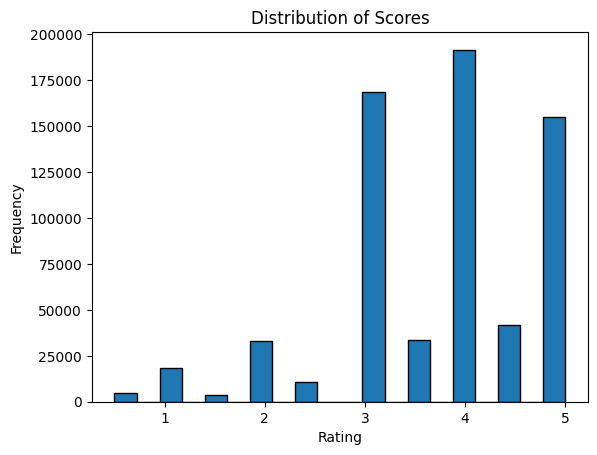

In [24]:
import matplotlib.pyplot as plt

# Plot a histogram of scores
plt.hist(data2['rating'], bins=20, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

In [27]:
unique_actors = data2['userId'].nunique()
unique_movies = data2['movieId'].nunique()

print(f'Number of unique actors: {unique_actors}')
print(f'Number of unique movies: {unique_movies}')

Number of unique actors: 17906
Number of unique movies: 987


In [30]:
selected_columns = ['userId', 'rating', 'title_safe']
df2 = data2[selected_columns]

In [31]:
df2

,userId,rating,title_safe
0,2038,2.0,Four Rooms(5.0)
1,2858,4.0,Four Rooms(5.0)
2,2928,4.0,Four Rooms(5.0)
3,5687,4.0,Four Rooms(5.0)
4,6795,2.5,Four Rooms(5.0)
...,...,...,...
661577,261914,4.0,Arrival(329865.0)
661578,264792,4.0,Arrival(329865.0)
661579,266079,4.0,Arrival(329865.0)
661580,267000,1.0,Arrival(329865.0)


### 2. Capturing latent variables

In [32]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156235 sha256=aee21aa753fe659b5e4e6c0383425960d8410e24a69d798d43087f5db60366c7
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [33]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy

In [35]:
# Create a Reader object specifying the rating scale (e.g., from 0.5 to 5.0)
reader = Reader(rating_scale=(0.5, 5.0))

# Load the DataFrame into a Surprise Dataset
surprise_df = Dataset.load_from_df(df2[['userId', 'rating', 'title_safe']], reader)

ValueError: ignored